In [1]:
import cv2
import numpy as np
import os
import fiftyone as fo
import fiftyone.brain as fob
import fiftyone.zoo as foz
import torchvision
import tensorflow

In [2]:
dataset = fo.Dataset.from_images_dir("test set")
print(dataset)

 100% |███████████████████| 27/27 [25.7ms elapsed, 0s remaining, 1.1K samples/s]      
Name:        2023.07.15.21.12.37
Media type:  image
Num samples: 27
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)


In [3]:
fo.launch_app(dataset)

Dataset:          2023.07.15.21.12.37
Media type:       image
Num samples:      27
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/

In [4]:
model = foz.load_zoo_model('resnet50-imagenet-torch')
embeddings = dataset.compute_embeddings(model)
results = fob.compute_visualization(dataset, embeddings=embeddings, seed=51)

C:\Users\julio\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\julio\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 100% |███████████████████| 27/27 [1.0m elapsed, 0s remaining, 0.6 samples/s]     
Generating visualization...
UMAP(random_state=51, verbose=True)
Sat Jul 15 21:14:31 2023 Construct fuzzy simplicial set
Sat Jul 15 21:14:31 2023 Finding Nearest Neighbors
Sat Jul 15 21:14:33 2023 Finished Nearest Neighbor Search
Sat Jul 15 21:14:36 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jul 15 21:14:36 2023 Finished embedding


In [6]:
session = fo.launch_app(dataset)
plot = results.visualize()
session.plots.attach(plot)
plot.show(height=512)

FigureWidget({
    'data': [{'customdata': array(['64b2a9556e5459414be119ac', '64b2a9556e5459414be119ad',
    …

In [7]:
embeddings

array([[5.72993696e-01, 1.63217168e-02, 9.54169687e-03, ...,
        3.40627669e-03, 1.15751103e-03, 8.80290382e-03],
       [4.17883486e-01, 1.57085568e-01, 1.62384324e-02, ...,
        3.02371420e-02, 6.70817718e-02, 1.66217208e-01],
       [4.20025319e-01, 1.62741154e-01, 1.62816346e-02, ...,
        3.50060053e-02, 5.99317811e-02, 1.72730491e-01],
       ...,
       [6.13763630e-01, 1.69824839e+00, 2.88156886e-02, ...,
        5.92063218e-02, 6.17620945e-02, 1.71964228e+00],
       [7.02516496e-01, 9.75565016e-01, 3.85941602e-02, ...,
        2.32284561e-01, 1.47652581e-01, 5.78331172e-01],
       [2.92017043e-01, 1.35497856e+00, 5.38158491e-02, ...,
        4.54270422e-01, 3.45218927e-01, 3.41901183e-01]])

In [265]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
from tqdm.auto import tqdm
import os
from matplotlib import pyplot as plt
def return_image_embedding(model,img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    if x.mean() <= 20:
        x *= 2
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    df = pd.DataFrame(preds[0]).T
    return df

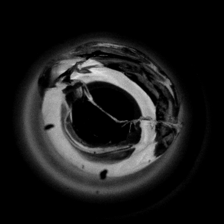

In [127]:
img = cv2.imread('cropped/4983.png')
img = image.array_to_img(img)
img = img.resize((224, 224))
img
# img = np.expand_dims(img, axis=0)

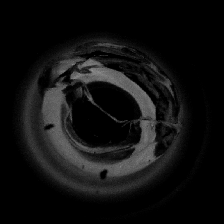

In [126]:
image.load_img('cropped/4983.png',target_size=(224, 224))

<BarContainer object of 24 artists>

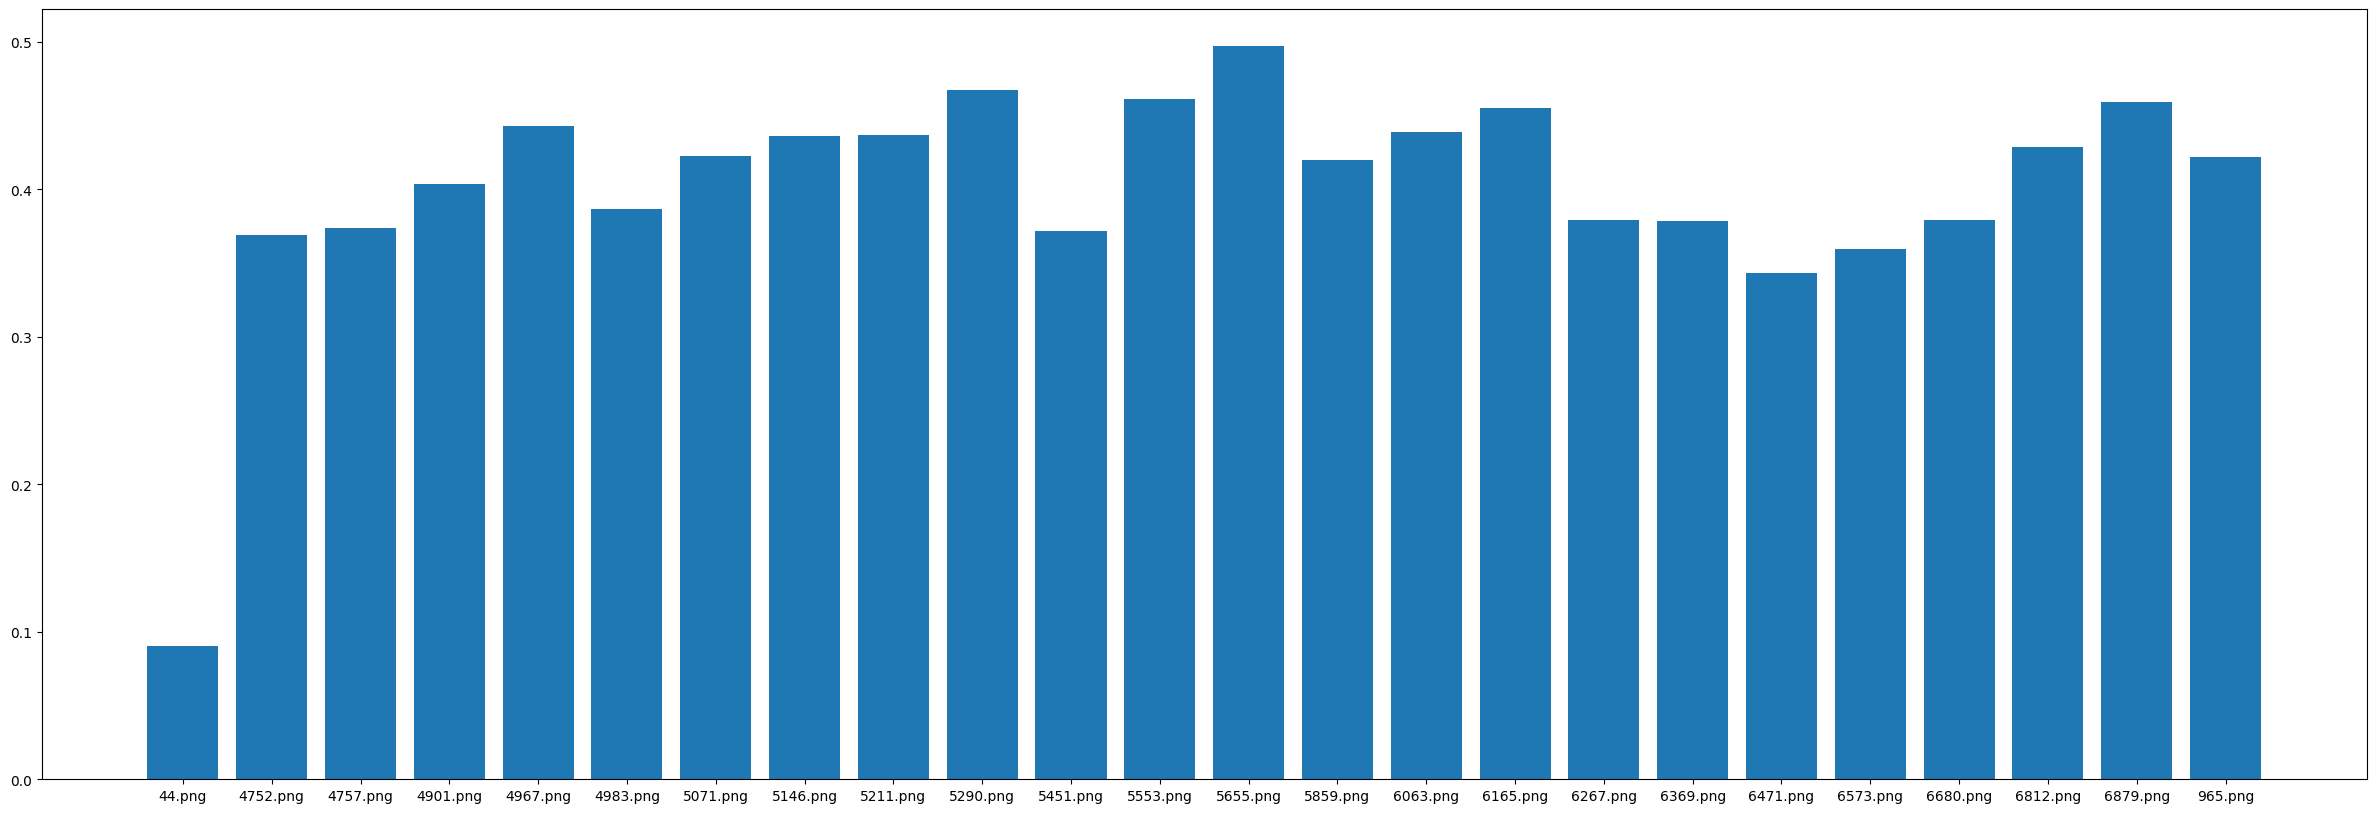

In [46]:
df_embedding.index = df_embedding.img
df = df_embedding.drop("img",axis=1)
plt.figure(figsize=(30,10))
plt.bar(df.index,df.mean(axis=1))

In [46]:
from sklearn.metrics.pairwise import cosine_distances,pairwise_distances,cosine_similarity
# cosine_similarity_df = pd.DataFrame(cosine_similarity(embedding_df.drop('image',axis=1)))

array([0.7941947], dtype=float32)

In [23]:
curr_index = embedding_df[embedding_df['image']=="965.png"].index[0]
closest_image = pd.DataFrame(cosine_similarity_df.iloc[curr_index].nlargest(23+1)[1:])
for index,imgs in closest_image.iterrows():
    similar_image_name = embedding_df.iloc[index]['image']
    similarity = np.round(imgs.iloc[0],3)
    print(similar_image_name, similarity)

6063.png 0.886
5146.png 0.881
5859.png 0.879
5451.png 0.878
4757.png 0.877
4752.png 0.877
6369.png 0.872
6471.png 0.869
5211.png 0.869
5290.png 0.868
5071.png 0.864
6165.png 0.85
5655.png 0.847
6812.png 0.847
6680.png 0.846
6267.png 0.845
5553.png 0.833
4967.png 0.794
6879.png 0.788
6573.png 0.774
4901.png 0.746
4983.png 0.706
44.png 0.463


In [24]:
curr_index = embedding_df[embedding_df['image']=="4967.png"].index[0]
closest_image = pd.DataFrame(cosine_similarity_df.iloc[curr_index].nlargest(23+1)[1:])
for index,imgs in closest_image.iterrows():
    similar_image_name = embedding_df.iloc[index]['image']
    similarity = np.round(imgs.iloc[0],3)
    print(similar_image_name, similarity)

4983.png 0.925
6267.png 0.921
5655.png 0.888
6573.png 0.887
6680.png 0.883
5553.png 0.881
4752.png 0.879
6063.png 0.877
5146.png 0.872
6879.png 0.872
4901.png 0.87
4757.png 0.869
5290.png 0.865
6812.png 0.836
5211.png 0.835
6471.png 0.826
5071.png 0.826
6165.png 0.8
965.png 0.794
6369.png 0.78
5859.png 0.776
5451.png 0.747
44.png 0.456


In [325]:
cropped_path = "cropped/"
edge_path = "edge/"
for img in os.listdir(cropped_path):
    x = cv2.imread(cropped_path+img)
    blur = cv2.GaussianBlur(x, (5, 5), 1)
    canny = cv2.Canny(blur, 10, 20, apertureSize=3)
    cv2.imwrite(edge_path + img, canny)

4.7324625


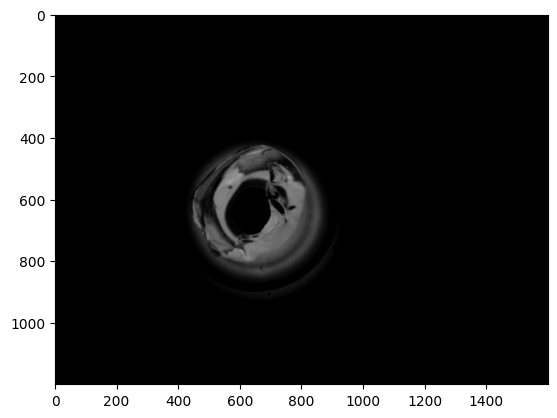

In [89]:
img = cv2.imread('test_set/6573.png')
# gray_pic = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting the image into grayscale
# r, threshold = cv2.threshold(gray_pic, 125, 255, cv2.THRESH_OTSU) #converting the image into grayscale using the histogram method
plt.imshow(img)
print(img.mean())

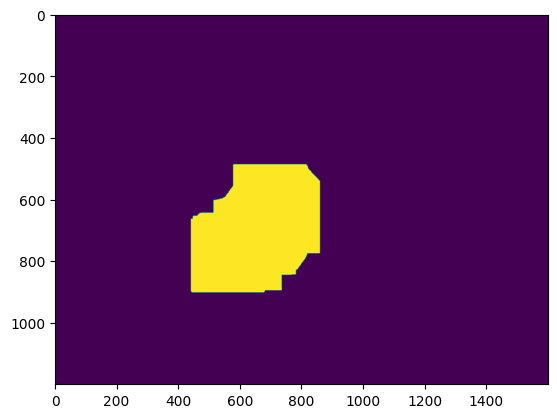

In [90]:
blur = cv2.GaussianBlur(img, (7, 7), 1)
canny = cv2.Canny(blur, 100, 300)  
kernel = np.ones((40, 40), np.uint8)
dilated = cv2.dilate(canny, kernel, iterations=6)
plt.imshow(dilated)

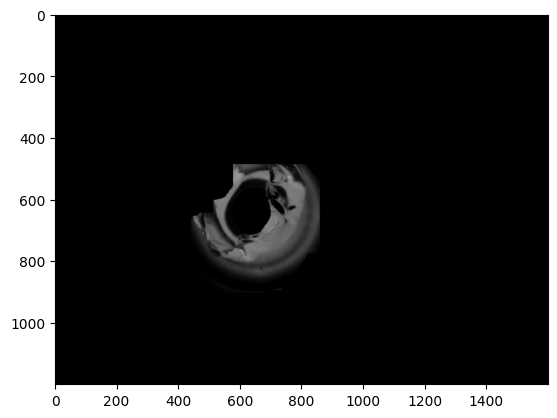

In [91]:
result = cv2.bitwise_and(img, img, mask=dilated)
plt.imshow(result)

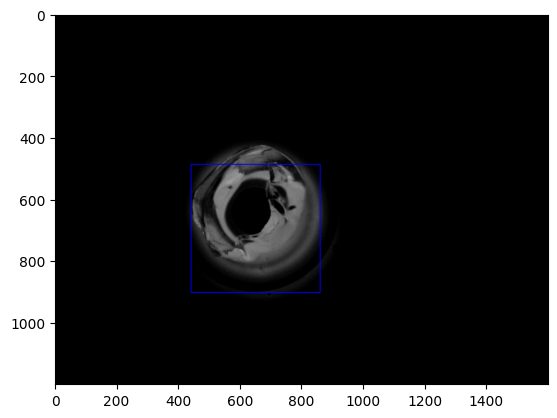

In [92]:
cnt, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
x, y, w, h = cv2.boundingRect(cnt[0])
cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)
plt.imshow(img)

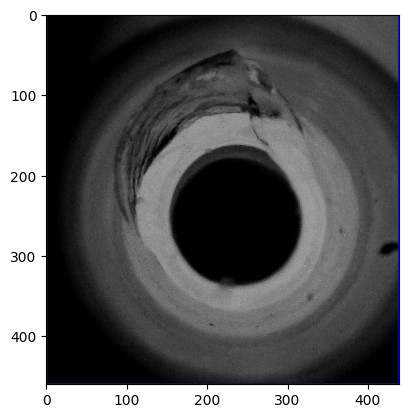

In [60]:
plt.imshow(img[y:y+h, x:x+w])

In [114]:
def crop_img(path):
    img = cv2.imread(path)
    if img.mean() < 5:
        new_img = img*2
    else:
        new_img = img
    
    blur = cv2.GaussianBlur(new_img, (7, 7), 1)
    canny = cv2.Canny(blur, 100, 300)  
    kernel = np.ones((40, 40), np.uint8)
    dilated = cv2.dilate(canny, kernel, iterations=6)
    cnt, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    if len(cnt) > 0:
        x, y, w, h = cv2.boundingRect(cnt[0])
        img = img[y:y+h, x:x+w]
    return img

43.09026290165531


True

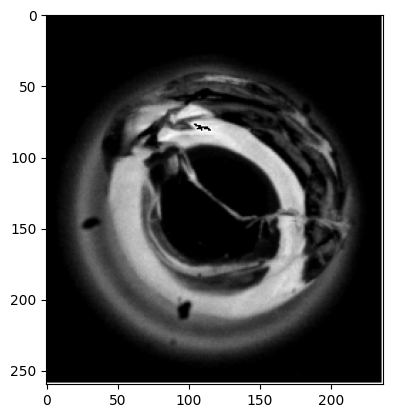

In [233]:
# image = crop_img('test_set/4901.png')
img = cv2.imread("NG.png")
print((img*2).mean())
plt.imshow(img*2)
cv2.imwrite("cropped/NG2.png",img*2)

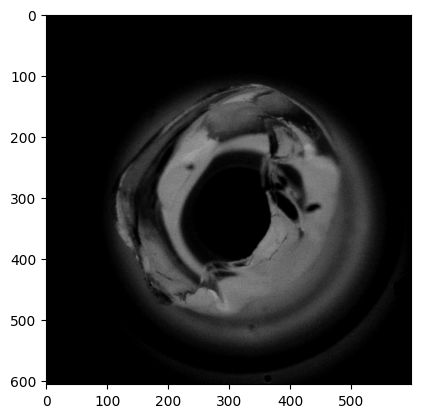

In [111]:
image = crop_img('test_set/6573.png')
plt.imshow(image)

In [115]:
path = "test_set"
cropped_path = "cropped/"
for img in os.listdir(path):
    cropped = crop_img(os.path.join(path,img))
    cv2.imwrite(os.path.join(cropped_path,img), cropped)

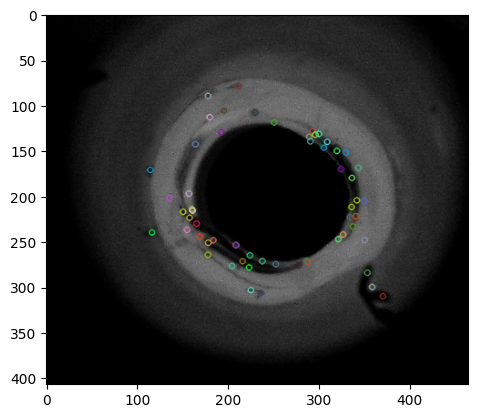

In [153]:
# SIFT
img = cv2.imread('cropped/5859.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
keypoints, descriptors = sift.detectAndCompute(img, None)
img=cv2.drawKeypoints(gray,keypoints,img)
plt.imshow(img)

True

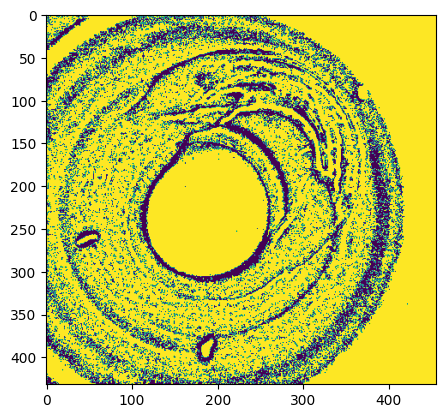

In [255]:
## local binary patterns
from skimage.feature import local_binary_pattern
img = cv2.imread('cropped/6063.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Define LBP parameters
radius = 5
n_points = 10 * radius

# Compute LBP feature
lbp_feature = local_binary_pattern(gray, n_points, radius, method='uniform')
lbp_gray = lbp_feature.astype('uint8')
r, threshold = cv2.threshold(lbp_gray, 125, 255, cv2.THRESH_OTSU) #converting the image into grayscale using the histogram method
plt.imshow(threshold)
cv2.imwrite("lbp.png",threshold)

In [209]:
# Compute histogram of the LBP feature
hist, _ = np.histogram(lbp_feature.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

# Normalize the histogram to obtain a probability distribution
hist = hist.astype('float')
hist /= (hist.sum() + 1e-7)
hist

array([0.02719561, 0.02340504, 0.01252737, 0.01137749, 0.01419442,
       0.02324903, 0.03309238, 0.02580882, 0.01583257, 0.01203333,
       0.01370904, 0.02344549, 0.58590613, 0.17822329])

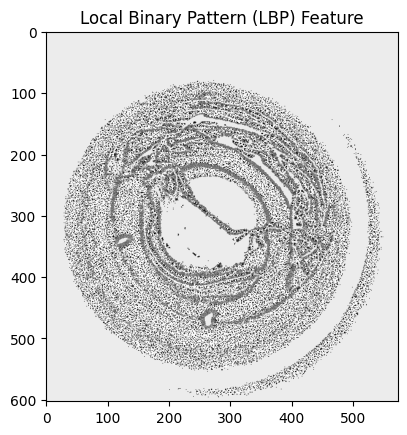

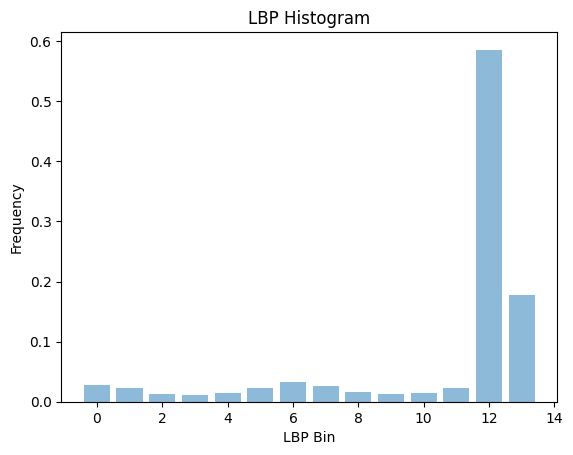

In [210]:
# Visualize the LBP feature
plt.imshow(lbp_feature, cmap='gray')
plt.title('Local Binary Pattern (LBP) Feature')
plt.show()

# Visualize the LBP histogram
plt.bar(np.arange(0, n_points + 2), hist, align='center', alpha=0.5)
plt.xlabel('LBP Bin')
plt.ylabel('Frequency')
plt.title('LBP Histogram')
plt.show()

In [272]:
def preprocessing(img_path):
    img = cv2.imread(img_path)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Define LBP parameters
    radius = 5
    n_points = 10 * radius

    # Compute LBP feature
    lbp_feature = local_binary_pattern(gray, n_points, radius, method='uniform')
    lbp_gray = lbp_feature.astype('uint8')
    
    # Compute threshold
    r, threshold = cv2.threshold(lbp_gray, 125, 255, cv2.THRESH_OTSU) #converting the image into grayscale using the histogram method
    return threshold

In [273]:
cropped_path = "cropped/"
prep_path = "prep/"
for img in os.listdir(cropped_path):
    prep = preprocessing(cropped_path+img)
    cv2.imwrite(prep_path + img, prep)

In [262]:
def return_image_embedding(model,img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    df = pd.DataFrame(preds[0]).T
    return df

In [267]:
model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
return_image_embedding(model,"prep/5655.png")

1/1 [==============================] - 5s 5s/step


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.176284,0.434702,2.21987,0.027825,0.346967,1.123345,0.080335,0.0,0.0,0.075493,...,0.0,2.570982,2.188129,0.0,0.704111,0.768012,0.077487,0.0,0.909405,1.075352


In [332]:
cropped_path = "prep/"
model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
df_embedding = pd.DataFrame()
for img in os.listdir(cropped_path):
    df = return_image_embedding(model,cropped_path+img)
    df['img'] = img
    df_embedding = pd.concat([df_embedding,df],ignore_index=True)
df_embedding

1/1 [==============================] - 0s 103ms/step


,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,img
0,0.000000,0.000000,0.000000,0.000000,0.003183,0.000000,0.076328,0.028501,0.000000,0.003552,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013953,0.000000,0.000000,44.png
1,0.402404,0.541063,1.813772,0.000000,0.233149,0.310170,0.106161,0.017950,0.112871,0.000000,...,1.563969,0.840356,0.000000,0.281235,0.159083,0.278074,0.003939,1.273169,0.246910,4752.png
2,0.530719,0.653259,2.318997,0.000000,0.260314,0.697839,0.085748,0.034723,0.216453,0.000000,...,1.453730,1.209768,0.000000,0.598747,0.111027,0.211123,0.057394,1.332793,0.140173,4757.png
3,0.573179,0.128371,2.168524,0.010216,0.068492,0.929257,0.031032,0.000000,0.000000,0.000000,...,0.988876,0.768576,0.000000,0.534917,1.215985,0.354903,0.047623,1.920972,0.173214,4901.png
4,1.125633,0.000000,1.893625,0.000000,0.176515,0.699336,0.040191,0.000000,0.000000,0.016530,...,1.156914,1.079107,0.000000,0.355866,0.901141,0.276534,0.002357,2.055582,0.202296,4967.png
5,0.803983,0.000000,1.580814,0.002737,0.056613,0.589747,0.007273,0.000000,0.000000,0.035268,...,0.917725,1.092495,0.000000,0.573743,0.491906,0.282878,0.076365,1.987512,0.123193,4983.png
6,0.424102,0.492273,2.310469,0.007854,0.252282,1.315276,0.062266,0.000858,0.435714,0.000000,...,1.984136,1.753849,0.006954,0.739583,0.804040,0.115474,0.000873,0.614570,0.192459,5071.png
7,0.531382,0.185733,1.746855,0.000000,0.481258,0.193871,0.038776,0.085290,0.719302,0.000000,...,1.459407,1.174893,0.000000,0.968873,0.363686,0.205446,0.000593,1.000450,0.112170,5146.png
8,0.745878,0.440637,2.149002,0.000000,0.191922,0.647112,0.038054,0.000000,0.365625,0.000000,...,1.970379,1.016279,0.000000,0.630758,0.559948,0.313501,0.000000,1.129923,0.072828,5211.png
9,0.370988,0.001406,2.646880,0.083100,0.474422,0.553268,0.069938,0.077874,0.710935,0.000000,...,3.287420,1.324283,0.000000,0.758703,0.673785,0.338716,0.000000,0.736129,0.090528,5290.png


In [333]:
from sklearn.metrics.pairwise import cosine_distances,pairwise_distances,cosine_similarity
cosine_similarity_df = pd.DataFrame(cosine_similarity(df_embedding.drop('img',axis=1)))

In [334]:
curr_index = df_embedding[df_embedding['img']=="965.png"].index[0]
closest_image = pd.DataFrame(cosine_similarity_df.iloc[curr_index].nlargest(23+1)[1:])
go = {}
for index,imgs in closest_image.iterrows():
    similar_image_name = df_embedding.iloc[index]['img']
    similarity = np.round(imgs.iloc[0],3)
    go[similar_image_name] = similarity
#     print(similar_image_name, similarity)
go

{'6812.png': 0.953,
 '6879.png': 0.952,
 '5290.png': 0.949,
 '5146.png': 0.947,
 '6063.png': 0.94,
 '5451.png': 0.925,
 '5211.png': 0.925,
 '6369.png': 0.92,
 '4752.png': 0.918,
 '4757.png': 0.915,
 '6267.png': 0.914,
 '5553.png': 0.913,
 '6471.png': 0.912,
 '5859.png': 0.91,
 '6165.png': 0.909,
 '5655.png': 0.904,
 '5071.png': 0.896,
 '6680.png': 0.893,
 '4901.png': 0.89,
 '6573.png': 0.887,
 '4983.png': 0.871,
 '4967.png': 0.869,
 '44.png': 0.2}

In [335]:
curr_index = df_embedding[df_embedding['img']=="4967.png"].index[0]
closest_image = pd.DataFrame(cosine_similarity_df.iloc[curr_index].nlargest(23+1)[1:])
ng = {}
for index,imgs in closest_image.iterrows():
    similar_image_name = df_embedding.iloc[index]['img']
    similarity = np.round(imgs.iloc[0],3)
    ng[similar_image_name] = similarity
ng

{'4983.png': 0.989,
 '6573.png': 0.972,
 '4752.png': 0.967,
 '4901.png': 0.962,
 '4757.png': 0.961,
 '5211.png': 0.956,
 '5655.png': 0.952,
 '6680.png': 0.95,
 '5553.png': 0.946,
 '6879.png': 0.94,
 '5071.png': 0.936,
 '5859.png': 0.933,
 '6267.png': 0.932,
 '6812.png': 0.932,
 '6471.png': 0.926,
 '6063.png': 0.924,
 '6165.png': 0.922,
 '5146.png': 0.92,
 '5290.png': 0.917,
 '6369.png': 0.917,
 '965.png': 0.869,
 '5451.png': 0.867,
 '44.png': 0.277}

In [330]:
go['965.png'] = 1
ng['4967.png'] = 1

In [300]:
for key in go:
    if go[key] >= 0.92 and ng[key] >= 0.90:
        quality = "GO"
    elif go[key] >= 0.92:
        quality = "GO"
    elif ng[key] >= 0.85:
        quality = "NG"
    else:
        quality = "None"
    print(key, quality)

6812.png GO
6879.png GO
5290.png GO
5146.png GO
6063.png GO
5451.png GO
5211.png GO
6369.png GO
4752.png NG
4757.png NG
6267.png NG
5553.png NG
6471.png NG
5859.png NG
6165.png NG
5655.png NG
5071.png NG
6680.png NG
4901.png NG
6573.png NG
4983.png NG
4967.png NG
44.png None
965.png GO


In [331]:
for key in go:
    if go[key] >= 0.95 and ng[key] >= 0.90:
        quality = "GO"
    elif go[key] >= 0.92:
        quality = "GO"
    elif ng[key] >= 0.85:
        quality = "NG"
    else:
        quality = "None"
    print(key, quality)

5146.png GO
6063.png GO
6369.png GO
6812.png GO
5211.png GO
6680.png GO
5071.png GO
5290.png GO
6879.png GO
6165.png GO
5655.png GO
4752.png GO
4757.png GO
6471.png GO
5553.png GO
6267.png GO
5859.png NG
6573.png NG
5451.png None
4901.png NG
4967.png NG
4983.png NG


KeyError: 'GO.png'